# Model Tuning

This notebook will demonstate how to automatically tune model hyperparameters for prediction accuracy.

## Set-Up
We will begin with some imports and then generate some training data using the simple cart-pole benchmark.

In [1]:
# Humanoid-v2 will crash the notebook 
gym_names = ["HalfCheetah-v2", "Hopper-v2", "Walker2d-v2", "Swimmer-v2", "InvertedPendulum-v2", 
              "Reacher-v2", "InvertedDoublePendulum-v2", 
              "Ant-v2", "Humanoid-v2", "HumanoidStandup-v2"]
name = gym_names[5]

In [2]:
import os
os.chdir('/home/baoyu/baoyul2/autompc')
import autompc as ampc
import numpy as np

from autompc.benchmarks import CartpoleSwingupBenchmark, benchmark
# from autompc.benchmarks.halfcheetah import HalfcheetahBenchmark, MetaBenchmark
from autompc.benchmarks.meta_benchmarks.reacher import ReacherBenchmark
from autompc.benchmarks.meta_benchmarks.ant import AntBenchmark
from autompc.benchmarks.meta_benchmarks.idp import IDPBenchmark
from autompc.benchmarks.meta_benchmarks.gym_mujoco import GymBenchmark

# benchmark = CartpoleSwingupBenchmark()
# benchmark = HalfcheetahBenchmark(name)
# benchmark = MetaBenchmark()

# benchmark = ReacherBenchmark()
# benchmark = AntBenchmark()
# benchmark = IDPBenchmark()

benchmark = GymBenchmark(name=name)

system = benchmark.system
trajs = benchmark.gen_trajs(seed=100, n_trajs=100, traj_len=200)

Loading AutoMPC...


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Finished loading AutoMPC
Reacher-v2


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment Reacher-v2 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/gym/envs/mujoco/mujoco_env.py:237: UserWarning: WARN: This version of the mujoco environments depends on the mujoco-py bindings, which are no longer maintained and may stop working. Please upgrade to the v4 versions of the environments (which depend on the mujoco python bindings instead), unless you are trying to precisely replicate previous works).
  logger.warn(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/baoyu/anaconda3/envs/autompc/lib/pytho

In [11]:
import os
os.chdir('/home/baoyu/baoyul2/autompc')
import autompc as ampc
import numpy as np
import pickle
import os

from autompc.benchmarks.meta_benchmarks.gym_mujoco import GymBenchmark

PATH = '/home/baoyu/baoyul2/autompc/autompc/model_metalearning/gym_mujoco_data'

gym_names = ["HalfCheetah-v2", "Hopper-v2", "Walker2d-v2", "Swimmer-v2", "InvertedPendulum-v2", 
              "Reacher-v2", "InvertedDoublePendulum-v2", 
              "Ant-v2", "Humanoid-v2", "HumanoidStandup-v2"]
gym_names = ["HalfCheetah-v2_small"]

for name in gym_names:
    benchmark = GymBenchmark(name="HalfCheetah-v2")
    system = benchmark.system
    trajs = benchmark.gen_trajs(seed=100, n_trajs=10, traj_len=20)
    
    # Save data
    data_name = name + '.pkl'
    output_file_name = os.path.join(PATH, data_name)
    print("Dumping to ", output_file_name)
    data = {'system': system, 'trajs': trajs}
    with open(output_file_name, 'wb') as fh:
        pickle.dump(data, fh)
    
    


HalfCheetah-v2
Dumping to  /home/baoyu/baoyul2/autompc/autompc/model_metalearning/gym_mujoco_data/HalfCheetah-v2_small.pkl


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment HalfCheetah-v2 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/gym/envs/mujoco/mujoco_env.py:237: UserWarning: WARN: This version of the mujoco environments depends on the mujoco-py bindings, which are no longer maintained and may stop working. Please upgrade to the v4 versions of the environments (which depend on the mujoco python bindings instead), unless you are trying to precisely replicate previous works).
  logger.warn(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/baoyu/anaconda3/envs/autompc/lib/p

In [12]:
import imp
import os
os.chdir('/home/baoyu/baoyul2/autompc')
import autompc as ampc
import numpy as np
import pickle
import os

from autompc.benchmarks.meta_benchmarks.metaworld import MetaBenchmark

PATH = '/home/baoyu/baoyul2/autompc/autompc/model_metalearning/meta_data'

metaworld_names = ['assembly-v2', 'basketball-v2', 'bin-picking-v2', 'box-close-v2', 
                'button-press-topdown-v2', 'button-press-topdown-wall-v2', 'button-press-v2', 
                'button-press-wall-v2', 'coffee-button-v2', 'coffee-pull-v2', 'coffee-push-v2', 
                'dial-turn-v2', 'disassemble-v2', 'door-close-v2', 'door-lock-v2', 'door-open-v2', 
                'door-unlock-v2', 'hand-insert-v2', 'drawer-close-v2', 'drawer-open-v2', 'faucet-open-v2', 
                'faucet-close-v2', 'hammer-v2', 'handle-press-side-v2', 'handle-press-v2', 'handle-pull-side-v2', 
                'handle-pull-v2', 'lever-pull-v2', 'peg-insert-side-v2', 'pick-place-wall-v2', 'pick-out-of-hole-v2', 
                'reach-v2', 'push-back-v2', 'push-v2', 'pick-place-v2', 'plate-slide-v2', 'plate-slide-side-v2', 
                'plate-slide-back-v2', 'plate-slide-back-side-v2', 'peg-unplug-side-v2', 'soccer-v2', 'stick-push-v2', 
                'stick-pull-v2', 'push-wall-v2', 'reach-wall-v2', 'shelf-place-v2', 'sweep-into-v2', 
                'sweep-v2', 'window-open-v2', 'window-close-v2']

for name in metaworld_names:
    benchmark = MetaBenchmark(name=name)
    system = benchmark.system
    trajs = benchmark.gen_trajs(seed=100, n_trajs=100, traj_len=200)
    
    # Save data
    data_name = name + '.pkl'
    output_file_name = os.path.join(PATH, data_name)
    print("Dumping to ", output_file_name)
    data = {'system': system, 'trajs': trajs}
    with open(output_file_name, 'wb') as fh:
        pickle.dump(data, fh)

assembly-v2


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Dumping to  /home/baoyu/baoyul2/autompc/autompc/model_metalearning/meta_data/assembly-v2.pkl


FileNotFoundError: [Errno 2] No such file or directory: '/home/baoyu/baoyul2/autompc/autompc/model_metalearning/meta_data/assembly-v2.pkl'

In [ ]:
len(trajs[0].obs)

200

In [ ]:
# DEBUG 0_std_problem
X = np.concatenate([traj.obs[:-1,:] for traj in trajs])
U = np.concatenate([traj.ctrls[:-1,:] for traj in trajs])
XU = np.concatenate((X, U), axis = 1) # stack X and U together
print("X {}; U {}; XU {}".format(X.shape, U.shape, XU.shape))


X (19900, 8); U (19900, 2); XU (19900, 10)


In [ ]:
def transform_input(xu_means, xu_std, XU):
    XUt = []
    for i in range(XU.shape[1]):
        # DEBUG: Sometimes mean and std are 0
        # print("MLP DEBUG", xu_means[i], xu_std[i])
        if xu_std[i] == 0:
            print(i)
            
            XUt.append(XU[:,i] - xu_means[i])
        else:
            XUt.append((XU[:,i] - xu_means[i]) / xu_std[i])
    return np.vstack(XUt).T

In [ ]:
xu_means = np.mean(XU, axis=0)
xu_std = np.std(XU, axis=0)
print(len(xu_std))
print(xu_std)

10
[48.64515366  2.14772688  0.09771759  0.10639156 18.03889872  9.90284742
  0.          0.          0.57756035  0.57732021]


## Auto-Tuning

By default, AutoMPC's `ModelTuner` will auto-select from all available models to fit the trajectories as best as possible. The tuner by default will run for 10 iterations, but for real problems you will want to run for many, many more iterations (100s).

In [ ]:
import imp
import os
os.chdir('/home/baoyu/baoyul2/autompc')
import autompc as ampc
import numpy as np
import pickle
import os

PATH = '/home/baoyu/baoyul2/autompc/autompc/model_metalearning/gym_mujoco_data'
name = "HalfCheetah-v2_small"
data_name = name + '.pkl'

input_file_name = os.path.join(PATH, data_name)
with open(input_file_name, 'rb') as fh:
    data = pickle.load(fh)
    system = data['system']
    trajs = data['trajs']


In [ ]:
from autompc.tuning import ModelTuner

tuner = ModelTuner(system,trajs,verbose=1,multi_fidelity=False)
print("Selecting from models",",".join(model.name for model in tuner.model.models))
tuned_model,tune_result = tuner.run(n_iters=100)

print("Selected model:",tuned_model.name)
print("Final cross-validated RMSE score:",tune_result.inc_costs[-1])

Cuda is used for GPytorch
Selecting from models MLP,ARX,Koopman,SINDy,ApproximateGPModel
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': False,
  'MLP:hidden_size_1': 128,
  'MLP:hidden_size_2': 128,
  'MLP:lr': 0.001,
  'MLP:n_hidden_layers': '2',
  'MLP:nonlintype': 'relu',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:00<00:00, 450.38it/s]
Model Score  6.563847631056436
Model tuning time 2.0866000652313232
Evaluating Cfg:
Configuration(values={
  'ApproximateGPModel:induce_count': 183,
  'ApproximateGPModel:learning_rate': 4.082490777779753,
  'model': 'ApproximateGPModel',
})

Seed 0 budget 0.0


100%|██████████| 20/20 [00:00<00:00, 79.72it/s]


Model Score  63.27798637896097
Model tuning time 1.805436611175537
Evaluating Cfg:
Configuration(values={
  'ARX:history': 10,
  'model': 'ARX',
})

Seed 0 budget 0.0
Model Score  14.083381114525812
Model tuning time 0.26363301277160645
Evaluating Cfg:
Configuration(values={
  'Koopman:method': 'stable',
  'Koopman:poly_basis': 'true',
  'Koopman:poly_cross_terms': 'false',
  'Koopman:poly_degree': 7,
  'Koopman:trig_basis': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Compute Stable Koopman
None
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Error is  906381829.0908585
 No descent: Restart FGM
 No descent: Restart FGM
Compute Stable Koopman
None
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Error is  1036760594.3374959
 No descent: Restart FGM
 No descent: Resta

/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.01186e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.01186e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.01186e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.01186e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklea

Model Score  35.59117432689142
Model tuning time 0.960974931716919
Evaluating Cfg:
Configuration(values={
  'Koopman:method': 'stable',
  'Koopman:poly_basis': 'false',
  'Koopman:trig_basis': 'true',
  'Koopman:trig_freq': 7,
  'Koopman:trig_interaction': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Compute Stable Koopman
None
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Error is  124.35595670375889
 No descent: Restart FGM
 No descent: Restart FGM
Compute Stable Koopman
None
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Error is  124.19835169962384
 No descent: Restart FGM
 No descent: Restart FGM
Compute Stable Koopman
None
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0

100%|██████████| 20/20 [00:00<00:00, 141.79it/s]


Model Score  74.12209485238064
Model tuning time 1.0495810508728027
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': True,
  'MLP:hidden_size_1': 30,
  'MLP:lr': 0.9084364898916701,
  'MLP:n_hidden_layers': '1',
  'MLP:nonlintype': 'sigmoid',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:00<00:00, 511.58it/s]
Model Score  19.898858845436184
Model tuning time 1.5690593719482422
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': False,
  'MLP:hidden_size_1': 254,
  'MLP:hidden_size_2': 140,
  'MLP:hidden_size_3': 208,
  'MLP:hidden_size_4': 149,
  'MLP:lr': 0.2879258182995813,
  'MLP:n_hidden_layers': '4',
  'MLP:nonlintype': 'selu',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:00<00:00, 288.18it/s]
Model Score  29.938085950217072
Model tuning time 2.722848653793335
Evaluating Cfg:
Configuration(values={
  'Koopman:method': 'stable',
  'Koopman:poly_basis': 'true',
  'Koopman:poly_cross_terms': 'false',
  'Koopman:poly_degree

could not broadcast input array from shape (6,6) into shape (0,6)
Traceback (most recent call last):
  File "/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/smac/tae/execute_func.py", line 219, in run
    rval = self._call_ta(self._ta, config, obj_kwargs)
  File "/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/smac/tae/execute_func.py", line 319, in _call_ta
    return obj(config, **obj_kwargs)
  File "/home/baoyu/baoyul2/autompc/autompc/tuning/model_tuner.py", line 123, in _evaluate
    value = self.evaluator(self.model)
  File "/home/baoyu/baoyul2/autompc/autompc/tuning/model_evaluator.py", line 160, in __call__
    m.train(train)
  File "/home/baoyu/baoyul2/autompc/autompc/sysid/autoselect.py", line 68, in train
    self.selected_model.train(trajs)
  File "/home/baoyu/baoyul2/autompc/autompc/sysid/arx.py", line 160, in train
    B[2*n : 2*n + l, :] = np.eye(l)
ValueError: could not broadcast input array from shape (6,6) into shape (0,6)


Model Score  25.29031845450115
Model tuning time 1.5170817375183105
Evaluating Cfg:
Configuration(values={
  'ARX:history': 1,
  'model': 'ARX',
})

Seed 0 budget 0.0
Evaluating Cfg:
Configuration(values={
  'SINDy:poly_basis': 'true',
  'SINDy:poly_cross_terms': 'false',
  'SINDy:poly_degree': 7,
  'SINDy:threshold': 5.350624242545481,
  'SINDy:time_mode': 'discrete',
  'SINDy:trig_basis': 'false',
  'model': 'SINDy',
})

Seed 0 budget 0.0


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in so

Model Score  15.205663408326467
Model tuning time 0.39659714698791504
Evaluating Cfg:
Configuration(values={
  'ARX:history': 8,
  'model': 'ARX',
})

Seed 0 budget 0.0
Model Score  14.976865835496435
Model tuning time 0.19025063514709473
Evaluating Cfg:
Configuration(values={
  'ARX:history': 3,
  'model': 'ARX',
})

Seed 0 budget 0.0
Model Score  6.012523521751611
Model tuning time 0.09889650344848633
Evaluating Cfg:
Configuration(values={
  'ARX:history': 7,
  'model': 'ARX',
})

Seed 0 budget 0.0
Model Score  16.59751309704735
Model tuning time 0.16860222816467285
Evaluating Cfg:
Configuration(values={
  'Koopman:lasso_alpha': 0.2742967898318095,
  'Koopman:method': 'lasso',
  'Koopman:poly_basis': 'false',
  'Koopman:trig_basis': 'true',
  'Koopman:trig_freq': 8,
  'Koopman:trig_interaction': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Call Lasso (1000 iters)
Call Lasso (1000 iters)
Call Lasso (1000 iters)
Model Score  6.121816184108387
Model tuning time 2.210551738739013

/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.6071755623175894) and eliminated all coefficients
  warnings.warn(


Model Score  33.959585100305375
Model tuning time 0.382051944732666
Evaluating Cfg:
Configuration(values={
  'SINDy:poly_basis': 'false',
  'SINDy:poly_cross_terms': 'false',
  'SINDy:threshold': 2.9330690890999137e-05,
  'SINDy:time_mode': 'discrete',
  'SINDy:trig_basis': 'true',
  'SINDy:trig_freq': 7,
  'SINDy:trig_interaction': 'false',
  'model': 'SINDy',
})

Seed 0 budget 0.0
Model Score  9.015413661545834
Model tuning time 0.6558871269226074
Evaluating Cfg:
Configuration(values={
  'ARX:history': 2,
  'model': 'ARX',
})

Seed 0 budget 0.0
Model Score  4.705476454013676
Model tuning time 0.03158855438232422
Evaluating Cfg:
Configuration(values={
  'Koopman:lasso_alpha': 2.369929264203797e-10,
  'Koopman:method': 'lasso',
  'Koopman:poly_basis': 'false',
  'Koopman:trig_basis': 'true',
  'Koopman:trig_freq': 3,
  'Koopman:trig_interaction': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Call Lasso (1000 iters)


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006076959441677173, tolerance: 0.00019514967547745472
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023704956652192528, tolerance: 8.843824934197778e-05
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008460029881779258, tolerance: 0.00017242975007161806
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/en

Call Lasso (1000 iters)


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006599196321374414, tolerance: 0.00012920971951077174
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002169538338600602, tolerance: 7.015630710128221e-05
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005549443304406298, tolerance: 0.00014560627009283875
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/env

Call Lasso (1000 iters)


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002793652573122513, tolerance: 0.00010135827916045013
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010068891050272256, tolerance: 5.816456622349559e-05
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031982359888714316, tolerance: 0.00011463124715283464
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/e

Model Score  553.8625813053076
Model tuning time 5.967392683029175
Evaluating Cfg:
Configuration(values={
  'ApproximateGPModel:induce_count': 143,
  'ApproximateGPModel:learning_rate': 0.37296132687384576,
  'model': 'ApproximateGPModel',
})

Seed 0 budget 0.0


100%|██████████| 20/20 [00:00<00:00, 91.36it/s]


Model Score  21.8808395009258
Model tuning time 1.5731635093688965
Evaluating Cfg:
Configuration(values={
  'Koopman:lasso_alpha': 9.592610514161057e-08,
  'Koopman:method': 'lasso',
  'Koopman:poly_basis': 'false',
  'Koopman:trig_basis': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Call Lasso (1000 iters)
Call Lasso (1000 iters)
Call Lasso (1000 iters)
Model Score  4.193582510859429
Model tuning time 0.09273004531860352
Evaluating Cfg:
Configuration(values={
  'Koopman:lasso_alpha': 2.5780656186959194e-05,
  'Koopman:method': 'lasso',
  'Koopman:poly_basis': 'false',
  'Koopman:trig_basis': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Call Lasso (1000 iters)
Call Lasso (1000 iters)
Call Lasso (1000 iters)
Model Score  4.191867905533768
Model tuning time 0.08634495735168457
Evaluating Cfg:
Configuration(values={
  'Koopman:lasso_alpha': 0.00017404224060787066,
  'Koopman:method': 'lasso',
  'Koopman:poly_basis': 'true',
  'Koopman:poly_cross_terms': 'false',
  'Koopman

/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.028385922481190158, tolerance: 0.00019514967547745472
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027971027447362594, tolerance: 8.843824934197778e-05
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.038751500562917394, tolerance: 0.00017242975007161806
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs

Call Lasso (1000 iters)


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027866077324559164, tolerance: 0.00012920971951077174
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026545432817591, tolerance: 7.015630710128221e-05
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.035990155619032224, tolerance: 0.00014560627009283875
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/au

Call Lasso (1000 iters)


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02383156354376812, tolerance: 0.00010135827916045013
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02114959609295994, tolerance: 5.816456622349559e-05
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03191200081453357, tolerance: 0.00011463124715283464
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/au

Model Score  10.909502496469257
Model tuning time 5.305548906326294
Evaluating Cfg:
Configuration(values={
  'SINDy:poly_basis': 'true',
  'SINDy:poly_cross_terms': 'false',
  'SINDy:poly_degree': 2,
  'SINDy:threshold': 0.0003753208870589683,
  'SINDy:time_mode': 'continuous',
  'SINDy:trig_basis': 'false',
  'model': 'SINDy',
})

Seed 0 budget 0.0
Model Score  22.73722473882727
Model tuning time 0.08975982666015625
Evaluating Cfg:
Configuration(values={
  'SINDy:poly_basis': 'false',
  'SINDy:poly_cross_terms': 'false',
  'SINDy:threshold': 0.010845989926043235,
  'SINDy:time_mode': 'continuous',
  'SINDy:trig_basis': 'false',
  'model': 'SINDy',
})

Seed 0 budget 0.0
Model Score  20.73437952632418
Model tuning time 0.07761764526367188
Evaluating Cfg:
Configuration(values={
  'ApproximateGPModel:induce_count': 109,
  'ApproximateGPModel:learning_rate': 6.278583818598641,
  'model': 'ApproximateGPModel',
})

Seed 0 budget 0.0


100%|██████████| 20/20 [00:00<00:00, 94.58it/s]


Model Score  30.088786070312906
Model tuning time 1.3040320873260498
Evaluating Cfg:
Configuration(values={
  'ApproximateGPModel:induce_count': 132,
  'ApproximateGPModel:learning_rate': 4.787138409222532,
  'model': 'ApproximateGPModel',
})

Seed 0 budget 0.0


100%|██████████| 20/20 [00:00<00:00, 89.41it/s]


Model Score  37.915235028319536
Model tuning time 1.5836265087127686
Evaluating Cfg:
Configuration(values={
  'Koopman:method': 'lstsq',
  'Koopman:poly_basis': 'false',
  'Koopman:trig_basis': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Model Score  4.0910811429063445
Model tuning time 0.07523202896118164
Evaluating Cfg:
Configuration(values={
  'ApproximateGPModel:induce_count': 138,
  'ApproximateGPModel:learning_rate': 6.5955479029544835,
  'model': 'ApproximateGPModel',
})

Seed 0 budget 0.0


100%|██████████| 20/20 [00:00<00:00, 89.37it/s]


Model Score  35.70822399801833
Model tuning time 1.6046028137207031
Evaluating Cfg:
Configuration(values={
  'ApproximateGPModel:induce_count': 96,
  'ApproximateGPModel:learning_rate': 0.377331153943046,
  'model': 'ApproximateGPModel',
})

Seed 0 budget 0.0


100%|██████████| 20/20 [00:00<00:00, 115.19it/s]


Model Score  21.856861437047044
Model tuning time 1.1650218963623047
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': True,
  'MLP:hidden_size_1': 150,
  'MLP:lr': 0.1503170934445474,
  'MLP:n_hidden_layers': '1',
  'MLP:nonlintype': 'sigmoid',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:00<00:00, 467.93it/s]
Model Score  9.059637059557508
Model tuning time 1.6829087734222412
Evaluating Cfg:
Configuration(values={
  'SINDy:poly_basis': 'false',
  'SINDy:poly_cross_terms': 'false',
  'SINDy:threshold': 3.10026184227698e-05,
  'SINDy:time_mode': 'discrete',
  'SINDy:trig_basis': 'false',
  'model': 'SINDy',
})

Seed 0 budget 0.0
Model Score  4.091080806823212
Model tuning time 0.05841350555419922
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': True,
  'MLP:hidden_size_1': 47,
  'MLP:hidden_size_2': 179,
  'MLP:hidden_size_3': 138,
  'MLP:hidden_size_4': 110,
  'MLP:lr': 1.1647505784078103e-05,
  'MLP:n_hidden_layers': '4',
  'MLP:nonlintype': '

Singular matrix
Traceback (most recent call last):
  File "/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/smac/tae/execute_func.py", line 219, in run
    rval = self._call_ta(self._ta, config, obj_kwargs)
  File "/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/smac/tae/execute_func.py", line 319, in _call_ta
    return obj(config, **obj_kwargs)
  File "/home/baoyu/baoyul2/autompc/autompc/tuning/model_tuner.py", line 123, in _evaluate
    value = self.evaluator(self.model)
  File "/home/baoyu/baoyul2/autompc/autompc/tuning/model_evaluator.py", line 160, in __call__
    m.train(train)
  File "/home/baoyu/baoyul2/autompc/autompc/sysid/autoselect.py", line 68, in train
    self.selected_model.train(trajs)
  File "/home/baoyu/baoyul2/autompc/autompc/sysid/koopman.py", line 204, in train
    A, _, _, _, B, _ = stabilize_discrete(X, U, Y, time_budget=self.budget)
  File "/home/baoyu/baoyul2/autompc/autompc/sysid/stable_koopman.py", line 115, in stabilize_discret

Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': True,
  'MLP:hidden_size_1': 208,
  'MLP:hidden_size_2': 109,
  'MLP:hidden_size_3': 155,
  'MLP:lr': 0.008373629426806738,
  'MLP:n_hidden_layers': '3',
  'MLP:nonlintype': 'tanh',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:00<00:00, 277.33it/s]
Model Score  7.743501206282752
Model tuning time 3.0602545738220215
Evaluating Cfg:
Configuration(values={
  'Koopman:method': 'stable',
  'Koopman:poly_basis': 'true',
  'Koopman:poly_cross_terms': 'false',
  'Koopman:poly_degree': 5,
  'Koopman:trig_basis': 'true',
  'Koopman:trig_freq': 8,
  'Koopman:trig_interaction': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Compute Stable Koopman
None
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Error is  3595595.601618371
 No descent: Restart FGM
Compute Stable Koopman
None
[[1. 0. 0. ... 0. 0. 0.]
 [

100%|██████████| 20/20 [00:00<00:00, 110.68it/s]


Model Score  45.64875319902466
Model tuning time 1.2622101306915283
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': False,
  'MLP:hidden_size_1': 47,
  'MLP:hidden_size_2': 33,
  'MLP:hidden_size_3': 207,
  'MLP:hidden_size_4': 58,
  'MLP:lr': 0.00011782426628601371,
  'MLP:n_hidden_layers': '4',
  'MLP:nonlintype': 'relu',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:00<00:00, 341.78it/s]
Model Score  14.62436572519671
Model tuning time 2.3198039531707764
Evaluating Cfg:
Configuration(values={
  'Koopman:lasso_alpha': 3.685857537655447e-05,
  'Koopman:method': 'lasso',
  'Koopman:poly_basis': 'false',
  'Koopman:trig_basis': 'true',
  'Koopman:trig_freq': 4,
  'Koopman:trig_interaction': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Call Lasso (1000 iters)


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003977811705296844, tolerance: 0.00019514967547745472
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005660836998477069, tolerance: 8.843824934197778e-05
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015332403333427336, tolerance: 0.00017242975007161806
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/e

Call Lasso (1000 iters)


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008427478253446245, tolerance: 0.00012920971951077174
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002792736913673423, tolerance: 7.015630710128221e-05
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008378430981037122, tolerance: 0.00014560627009283875
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/e

Call Lasso (1000 iters)


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005130644175988483, tolerance: 0.00010135827916045013
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002483633973784508, tolerance: 5.816456622349559e-05
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00052281937075446, tolerance: 0.00011463124715283464
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/env

Model Score  119.46288856981779
Model tuning time 8.529520034790039
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': True,
  'MLP:hidden_size_1': 255,
  'MLP:hidden_size_2': 241,
  'MLP:lr': 0.18657527576589988,
  'MLP:n_hidden_layers': '2',
  'MLP:nonlintype': 'relu',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:00<00:00, 320.94it/s]
Model Score  13.179772047536192
Model tuning time 2.533871650695801
Evaluating Cfg:
Configuration(values={
  'SINDy:poly_basis': 'true',
  'SINDy:poly_cross_terms': 'false',
  'SINDy:poly_degree': 3,
  'SINDy:threshold': 2.476539724325304,
  'SINDy:time_mode': 'discrete',
  'SINDy:trig_basis': 'true',
  'SINDy:trig_freq': 5,
  'SINDy:trig_interaction': 'false',
  'model': 'SINDy',
})

Seed 0 budget 0.0


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:183: UserWarning: Sparsity parameter is too big (2.476539724325304) and eliminated all coefficients
  warnings.warn(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:183: UserWarning: Sparsity parameter is too big (2.476539724325304) and eliminated all coefficients
  warnings.warn(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:183: UserWarning: Sparsity parameter is too big (2.476539724325304) and eliminated all coefficients
  warnings.warn(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singula

Model Score  15.205663408326467
Model tuning time 0.41820812225341797
Evaluating Cfg:
Configuration(values={
  'SINDy:poly_basis': 'true',
  'SINDy:poly_cross_terms': 'false',
  'SINDy:poly_degree': 8,
  'SINDy:threshold': 0.010137801505263529,
  'SINDy:time_mode': 'continuous',
  'SINDy:trig_basis': 'false',
  'model': 'SINDy',
})

Seed 0 budget 0.0


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in so

Model Score  57.26195714886155
Model tuning time 0.4706113338470459
Evaluating Cfg:
Configuration(values={
  'Koopman:lasso_alpha': 1.430282168831745e-09,
  'Koopman:method': 'lasso',
  'Koopman:poly_basis': 'false',
  'Koopman:trig_basis': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Call Lasso (1000 iters)
Call Lasso (1000 iters)
Call Lasso (1000 iters)
Model Score  4.193588854193625
Model tuning time 0.10063028335571289
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': False,
  'MLP:hidden_size_1': 216,
  'MLP:hidden_size_2': 216,
  'MLP:lr': 0.0051935186792371,
  'MLP:n_hidden_layers': '2',
  'MLP:nonlintype': 'sigmoid',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:00<00:00, 422.32it/s]
Model Score  5.554778473075767
Model tuning time 1.889941692352295
Evaluating Cfg:
Configuration(values={
  'ApproximateGPModel:induce_count': 72,
  'ApproximateGPModel:learning_rate': 9.826340245762895,
  'model': 'ApproximateGPModel',
})

Seed 0 budget 0.0


100%|██████████| 20/20 [00:00<00:00, 122.35it/s]


Model Score  93.07163444441092
Model tuning time 1.1123156547546387
Evaluating Cfg:
Configuration(values={
  'SINDy:poly_basis': 'false',
  'SINDy:poly_cross_terms': 'false',
  'SINDy:threshold': 1.409982883928398,
  'SINDy:time_mode': 'continuous',
  'SINDy:trig_basis': 'true',
  'SINDy:trig_freq': 4,
  'SINDy:trig_interaction': 'false',
  'model': 'SINDy',
})

Seed 0 budget 0.0


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (1.409982883928398) and eliminated all coefficients
  warnings.warn(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (1.409982883928398) and eliminated all coefficients
  warnings.warn(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (1.409982883928398) and eliminated all coefficients
  warnings.warn(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (1.409982883928398) and eliminated all coefficients
  warnings.warn(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (1.409982883928398) and elimi

Model Score  79.63652078474459
Model tuning time 0.6241817474365234
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': False,
  'MLP:hidden_size_1': 217,
  'MLP:hidden_size_2': 21,
  'MLP:hidden_size_3': 162,
  'MLP:hidden_size_4': 74,
  'MLP:lr': 0.6623451282448463,
  'MLP:n_hidden_layers': '4',
  'MLP:nonlintype': 'tanh',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:00<00:00, 333.16it/s]
Model Score  78.52272212195797
Model tuning time 2.390342950820923
Evaluating Cfg:
Configuration(values={
  'Koopman:method': 'lstsq',
  'Koopman:poly_basis': 'false',
  'Koopman:trig_basis': 'true',
  'Koopman:trig_freq': 6,
  'Koopman:trig_interaction': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Model Score  13.888846440498503
Model tuning time 1.7901296615600586
Evaluating Cfg:
Configuration(values={
  'Koopman:lasso_alpha': 2.480149095456185e-10,
  'Koopman:method': 'lasso',
  'Koopman:poly_basis': 'false',
  'Koopman:trig_basis': 'false',
  'model': 'Koop

100%|██████████| 20/20 [00:00<00:00, 121.94it/s]


Model Score  24.611423107847457
Model tuning time 1.133284568786621
Evaluating Cfg:
Configuration(values={
  'Koopman:method': 'lstsq',
  'Koopman:poly_basis': 'false',
  'Koopman:trig_basis': 'true',
  'Koopman:trig_freq': 8,
  'Koopman:trig_interaction': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Model Score  11.067980096920662
Model tuning time 2.0668253898620605
Evaluating Cfg:
Configuration(values={
  'ApproximateGPModel:induce_count': 54,
  'ApproximateGPModel:learning_rate': 5.452345926198292,
  'model': 'ApproximateGPModel',
})

Seed 0 budget 0.0


100%|██████████| 20/20 [00:00<00:00, 135.21it/s]


Model Score  24.12268475701434
Model tuning time 1.0304310321807861
Evaluating Cfg:
Configuration(values={
  'Koopman:method': 'stable',
  'Koopman:poly_basis': 'false',
  'Koopman:trig_basis': 'true',
  'Koopman:trig_freq': 5,
  'Koopman:trig_interaction': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Compute Stable Koopman
None
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Error is  166.30568788553236
 No descent: Restart FGM
 No descent: Restart FGM
Compute Stable Koopman
None
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Error is  179.23913258432538
 No descent: Restart FGM
 No descent: Restart FGM
Compute Stable Koopman
None
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 

/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3000610429641788e-06, tolerance: 1.659221024579803e-06
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.746037370566703e-06, tolerance: 1.6225585547670164e-06
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.316629705423855e-06, tolerance: 6.738618550286195e-06
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/e

Call Lasso (1000 iters)


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8066391640727084e-06, tolerance: 8.478010223462899e-07
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0185622151668728e-06, tolerance: 9.065775663437942e-07
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5695710376243214e-06, tolerance: 1.3632393844964247e-06
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3

Call Lasso (1000 iters)


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8841914360583309e-06, tolerance: 1.1511589212377336e-06
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.727900503304104e-07, tolerance: 7.502155941064787e-07
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.111200023396921e-06, tolerance: 8.386924378256557e-07
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/e

Model Score  160.46361023701434
Model tuning time 51.75143551826477
Evaluating Cfg:
Configuration(values={
  'ApproximateGPModel:induce_count': 154,
  'ApproximateGPModel:learning_rate': 3.199537634662111,
  'model': 'ApproximateGPModel',
})

Seed 0 budget 0.0


100%|██████████| 20/20 [00:00<00:00, 87.89it/s]


Model Score  32.23574275986796
Model tuning time 1.6310620307922363
Evaluating Cfg:
Configuration(values={
  'Koopman:lasso_alpha': 1.2723257254352488e-09,
  'Koopman:method': 'lasso',
  'Koopman:poly_basis': 'true',
  'Koopman:poly_cross_terms': 'false',
  'Koopman:poly_degree': 3,
  'Koopman:trig_basis': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Call Lasso (1000 iters)


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001207313247782048, tolerance: 0.00019514967547745472
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005060750933028139, tolerance: 8.843824934197778e-05
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017133285341028783, tolerance: 0.00017242975007161806
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs

Call Lasso (1000 iters)


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4678482053160883, tolerance: 0.00019142167841215086
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.33806280203170186, tolerance: 0.00021614977389889877
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17389873984957255, tolerance: 8.786619657481812e-05
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/aut

Call Lasso (1000 iters)


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012791730165751485, tolerance: 0.00011463124715283464
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02717816499876551, tolerance: 0.0005527109463286516
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03033665631843295, tolerance: 0.0010341806923707942
  model = cd_fast.enet_coordinate_descent(
/home/baoyu/anaconda3/envs/au

Model Score  5.717704166020646
Model tuning time 0.8848288059234619
Evaluating Cfg:
Configuration(values={
  'ApproximateGPModel:induce_count': 79,
  'ApproximateGPModel:learning_rate': 3.1041912964312433,
  'model': 'ApproximateGPModel',
})

Seed 0 budget 0.0


100%|██████████| 20/20 [00:00<00:00, 118.58it/s]


Model Score  24.680953944874798
Model tuning time 1.155010461807251
Evaluating Cfg:
Configuration(values={
  'ApproximateGPModel:induce_count': 181,
  'ApproximateGPModel:learning_rate': 9.275672724546475,
  'model': 'ApproximateGPModel',
})

Seed 0 budget 0.0


100%|██████████| 20/20 [00:00<00:00, 88.40it/s]


Model Score  84.35040621427778
Model tuning time 1.6002843379974365
Evaluating Cfg:
Configuration(values={
  'Koopman:method': 'stable',
  'Koopman:poly_basis': 'false',
  'Koopman:trig_basis': 'true',
  'Koopman:trig_freq': 8,
  'Koopman:trig_interaction': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Compute Stable Koopman
None
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Error is  123.86067703170889
 No descent: Restart FGM
 No descent: Restart FGM
Compute Stable Koopman
None
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Error is  122.69789145127895
 No descent: Restart FGM
 No descent: Restart FGM
Compute Stable Koopman
None
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 

100%|██████████| 20/20 [00:00<00:00, 120.58it/s]


Model Score  27.071047519054044
Model tuning time 1.1474769115447998
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': False,
  'MLP:hidden_size_1': 177,
  'MLP:hidden_size_2': 118,
  'MLP:hidden_size_3': 236,
  'MLP:lr': 0.00017231009682723285,
  'MLP:n_hidden_layers': '3',
  'MLP:nonlintype': 'relu',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:00<00:00, 362.70it/s]
Model Score  6.761851871073898
Model tuning time 2.2057182788848877
Evaluating Cfg:
Configuration(values={
  'Koopman:lasso_alpha': 8.449216422797015,
  'Koopman:method': 'lasso',
  'Koopman:poly_basis': 'false',
  'Koopman:trig_basis': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Call Lasso (1000 iters)
Call Lasso (1000 iters)
Call Lasso (1000 iters)
Model Score  15.002363148839448
Model tuning time 0.07920360565185547
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': True,
  'MLP:hidden_size_1': 182,
  'MLP:hidden_size_2': 70,
  'MLP:hidden_size_3': 227,
  'MLP:hidden_size

100%|██████████| 20/20 [00:00<00:00, 119.16it/s]


Model Score  27.32917934775459
Model tuning time 1.1317179203033447
Evaluating Cfg:
Configuration(values={
  'ApproximateGPModel:induce_count': 93,
  'ApproximateGPModel:learning_rate': 3.2980144568601584,
  'model': 'ApproximateGPModel',
})

Seed 0 budget 0.0


100%|██████████| 20/20 [00:00<00:00, 113.81it/s]


Model Score  30.756554065052864
Model tuning time 1.1648218631744385
Evaluating Cfg:
Configuration(values={
  'ApproximateGPModel:induce_count': 160,
  'ApproximateGPModel:learning_rate': 3.35335653712109,
  'model': 'ApproximateGPModel',
})

Seed 0 budget 0.0


100%|██████████| 20/20 [00:00<00:00, 88.92it/s]


Model Score  34.77208543823901
Model tuning time 1.5803117752075195
Evaluating Cfg:
Configuration(values={
  'Koopman:method': 'lstsq',
  'Koopman:poly_basis': 'true',
  'Koopman:poly_cross_terms': 'false',
  'Koopman:poly_degree': 2,
  'Koopman:trig_basis': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Model Score  4.503800553145517
Model tuning time 0.23140406608581543
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': True,
  'MLP:hidden_size_1': 17,
  'MLP:hidden_size_2': 18,
  'MLP:lr': 0.044006200370722406,
  'MLP:n_hidden_layers': '2',
  'MLP:nonlintype': 'relu',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:00<00:00, 377.19it/s]
Model Score  9.083248166892067
Model tuning time 2.176210403442383
Evaluating Cfg:
Configuration(values={
  'Koopman:method': 'stable',
  'Koopman:poly_basis': 'true',
  'Koopman:poly_cross_terms': 'false',
  'Koopman:poly_degree': 2,
  'Koopman:trig_basis': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Comput

/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.85816e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.85816e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.85816e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.85816e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklea

Model Score  2419.5182113011597
Model tuning time 0.6681985855102539
Evaluating Cfg:
Configuration(values={
  'Koopman:lasso_alpha': 3.0282914599710797e-09,
  'Koopman:method': 'lasso',
  'Koopman:poly_basis': 'false',
  'Koopman:trig_basis': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Call Lasso (1000 iters)
Call Lasso (1000 iters)
Call Lasso (1000 iters)
Model Score  4.19358874691645
Model tuning time 0.09822607040405273
Evaluating Cfg:
Configuration(values={
  'Koopman:method': 'stable',
  'Koopman:poly_basis': 'true',
  'Koopman:poly_cross_terms': 'false',
  'Koopman:poly_degree': 3,
  'Koopman:trig_basis': 'true',
  'Koopman:trig_freq': 1,
  'Koopman:trig_interaction': 'false',
  'model': 'Koopman',
})

Seed 0 budget 0.0
Compute Stable Koopman
None
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Error is  17701.96627691313
 No descent: Restart FGM
 No descent: Resta

100%|██████████| 20/20 [00:00<00:00, 107.47it/s]


Model Score  25.38852264889562
Model tuning time 1.2136588096618652
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': True,
  'MLP:hidden_size_1': 135,
  'MLP:hidden_size_2': 73,
  'MLP:hidden_size_3': 248,
  'MLP:lr': 0.007605737402973772,
  'MLP:n_hidden_layers': '3',
  'MLP:nonlintype': 'relu',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:00<00:00, 277.64it/s]
Model Score  10.114370170060992
Model tuning time 2.9330015182495117
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': False,
  'MLP:hidden_size_1': 220,
  'MLP:hidden_size_2': 100,
  'MLP:lr': 2.0975760313194024e-05,
  'MLP:n_hidden_layers': '2',
  'MLP:nonlintype': 'sigmoid',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:00<00:00, 456.85it/s]
Model Score  22.725113219001543
Model tuning time 1.7315397262573242
Evaluating Cfg:
Configuration(values={
  'ApproximateGPModel:induce_count': 66,
  'ApproximateGPModel:learning_rate': 7.145315791143928,
  'model': 'Approx

100%|██████████| 20/20 [00:00<00:00, 121.96it/s]


Model Score  46.71299532642638
Model tuning time 1.1248738765716553
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': True,
  'MLP:hidden_size_1': 106,
  'MLP:lr': 0.01042202748848318,
  'MLP:n_hidden_layers': '1',
  'MLP:nonlintype': 'selu',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:00<00:00, 493.11it/s]
Model Score  5.308248059880856
Model tuning time 1.6474640369415283
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': False,
  'MLP:hidden_size_1': 85,
  'MLP:hidden_size_2': 220,
  'MLP:hidden_size_3': 179,
  'MLP:lr': 0.058647526101087144,
  'MLP:n_hidden_layers': '3',
  'MLP:nonlintype': 'sigmoid',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:00<00:00, 360.33it/s]
Model Score  23.644591249330812
Model tuning time 2.220107316970825
Evaluating Cfg:
Configuration(values={
  'Koopman:lasso_alpha': 23.274174841018265,
  'Koopman:method': 'lasso',
  'Koopman:poly_basis': 'false',
  'Koopman:trig_basis': 'false',
  'model'

100%|██████████| 20/20 [00:00<00:00, 90.74it/s]


Model Score  47.38097622260472
Model tuning time 1.5725271701812744
Selected model: SINDy
Final cross-validated RMSE score: 4.091080806823212


In [ ]:
print(tune_result.inc_cfg)

Configuration(values={
  'SINDy:poly_basis': 'false',
  'SINDy:poly_cross_terms': 'false',
  'SINDy:threshold': 3.10026184227698e-05,
  'SINDy:time_mode': 'discrete',
  'SINDy:trig_basis': 'false',
  'model': 'SINDy',
})



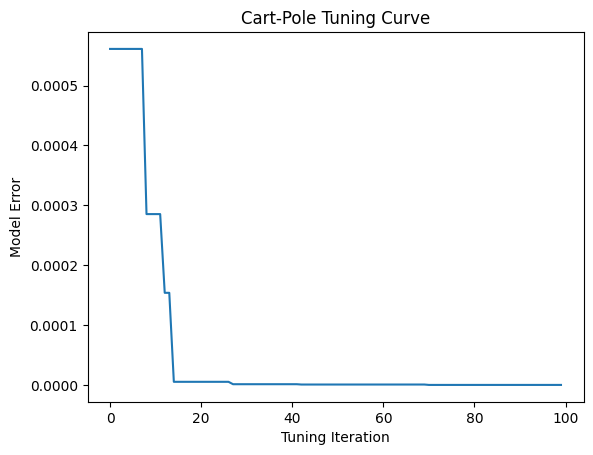

In [ ]:
%matplotlib inline

from autompc.graphs import plot_tuning_curve,plot_tuning_correlations
import matplotlib.pyplot as plt

plot_tuning_curve(tune_result)
plt.title("Cart-Pole Tuning Curve")
plt.show()

In [ ]:
config_str = str(tune_result.inc_cfg)
print(config_str)

Configuration(values={
  'MLP:batchnorm': False,
  'MLP:hidden_size_1': 128,
  'MLP:hidden_size_2': 128,
  'MLP:lr': 0.001,
  'MLP:n_hidden_layers': '2',
  'MLP:nonlintype': 'relu',
  'model': 'MLP',
})



In [ ]:
info = {
            'env': name,
            'final_score': tune_result.inc_costs[-1],
            'final_config': dict(tune_result.inc_cfg),
            'costs': tune_result.costs
        }

In [ ]:
info = {
            'env': name,
            'final_score': 3,
            'final_config': dict(tune_result.inc_cfg),
            'costs': tune_result.costs
        }

In [ ]:
import json
from ConfigSpace.read_and_write import json as config_json

with open('meta.json', 'w') as outfile:
    outfile.write(json.dumps(info, indent=2))

: 

In [ ]:
import ConfigSpace
config = ConfigSpace(config_str)

TypeError: 'module' object is not callable

You can customize the behavior of tuning by specifying which evaluation strategy we wish to use.  Possible options include splitting method (holdout vs cross-validation), which horizon to measure predictions upon, and what scoring metric to use.  By default, ModelTuner uses 3-fold cross-validation and one-step RMSE.

Here's an example of customizing the evaluator to use with 10\% holdout and the RMSE metric with a 5-step prediction horizon.

In [ ]:
tuner = ModelTuner(system,trajs,eval_holdout=0.1,eval_folds=1,eval_metric='rmse',eval_horizon=5)

To customize behavior even further, we can use a `ModelEvaluator` class, which has various subclasses.  As an example, the HoldoutModelEvaluator is specified here.  The `evaluator` keyword to ModelTuner will specify an evaluator that overrides the default keyword arguments.

In [ ]:
from autompc.tuning import HoldoutModelEvaluator

evaluator = HoldoutModelEvaluator(trajs, metric="rmse", holdout_prop=0.1,
                                  rng=np.random.default_rng(100), horizon=20)
tuner = ModelTuner(system,trajs,evaluator=evaluator)

## Specifying the Model Class

In some cases we know which model class we wish to tune, and ModelTuner can also accept a specified class.  For example, we can consider the MLP model. Here we'll perform a much longer tuning run, so let this run for a few hours...

**Alternatively, you can save/load the tuning data from a prior run by setting `dump=False` in the following cell, and skipping the tuning altogether.**

In [ ]:
from autompc.sysid import MLP

tuner = ModelTuner(system,trajs,MLP(system),verbose=True)
tuned_model, tune_result = tuner.run(n_iters=200,rng=np.random.default_rng(200))

Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 128,
  'hidden_size_2': 128,
  'lr': 0.001,
  'n_hidden_layers': '2',
  'nonlintype': 'relu',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:44<00:00,  4.52it/s]

Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)



Model Score  nan


FirstRunCrashedException: First run crashed, abort. Please check your setup -- we assume that your default configuration does not crashes. (To deactivate this exception, use the SMAC scenario option 'abort_on_first_run_crash'). Additional run info: {}

In [ ]:
import pickle

#To dump tuning result, turn to True.  To load it, turn to False
DUMP = False
if DUMP:
    with open('tuned_mlp_model.pkl','wb') as f:
        pickle.dump(tuned_model,f)
    with open('mlp_model_tuning_result.pkl','wb') as f:
        pickle.dump(tune_result,f)
else:
    with open('tuned_mlp_model.pkl','rb') as f:
        tuned_model = pickle.load(f)
    with open('mlp_model_tuning_result.pkl','rb') as f:
        tune_result = pickle.load(f)

Let's check what configuration was selected by the tuner.

In [ ]:
tune_result.inc_cfg

Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 220,
  'hidden_size_2': 155,
  'lr': 0.000606990613048173,
  'n_hidden_layers': '2',
  'nonlintype': 'tanh',
})

We see that the tuner selected a 2-layer MLP with `tanh` activations. 

Before we move on, let's note that another option is to specify a set of model classes to use. To do so we can use the AutoSelectModel class as the model as follows:

In [ ]:
from autompc.sysid import SINDy
from autompc.sysid import AutoSelectModel

selector = AutoSelectModel(system,[MLP(system),SINDy(system)])
tuner = ModelTuner(system,trajs,model=selector)

## Visualizing the Results

We can now visualize the tuning results.  First, we will plot the tuning curve.  This shows the holdout set performance of the best-known model at different points over the course of the tuning process.

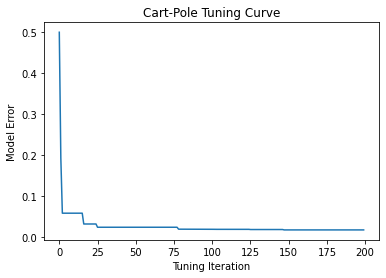

In [ ]:
%matplotlib inline

from autompc.graphs import plot_tuning_curve,plot_tuning_correlations
import matplotlib.pyplot as plt

plot_tuning_curve(tune_result)
plt.title("Cart-Pole Tuning Curve")
plt.show()

To further study the tuning, we can examine how the cost correlates with various hyperparameter settings using the `plot_tuning_correlations` function.

[]

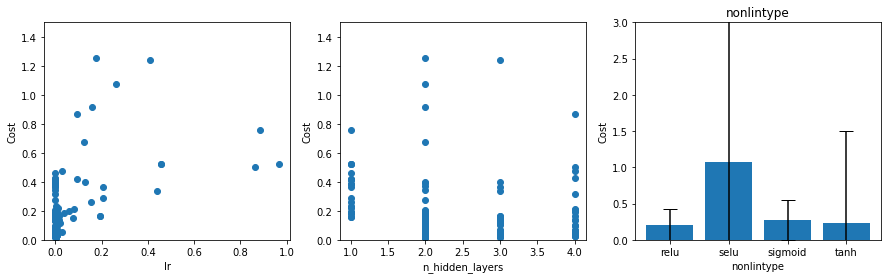

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,4))
plot_tuning_correlations(tune_result,'lr',ax=ax1)
plot_tuning_correlations(tune_result,'n_hidden_layers',ax=ax2)
plot_tuning_correlations(tune_result,'nonlintype',ax=ax3)
ax1.set_ylim(0,1.5)
ax2.set_ylim(0,1.5)
ax3.set_ylim(0,3.0)
ax3.set_title('nonlintype')
plt.plot()

Next, we can compare the performance of our tuned model to the default MLP configuration.  We will generate a fresh dataset for testing and compare over multiple prediction horizons.  For more details on how to do this comparison, see [2. Models].

100%|██████████| 50/50 [00:21<00:00,  2.30it/s]


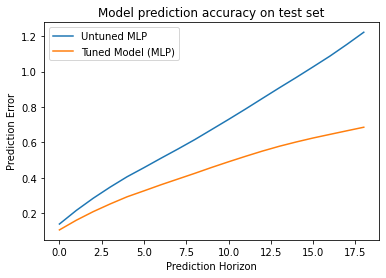

In [ ]:
untuned_model = MLP(system)
untuned_model.train(trajs)

testing_set = benchmark.gen_trajs(seed=101, n_trajs=100, traj_len=200)

from autompc.graphs.kstep_graph import KstepPredAccGraph

graph = KstepPredAccGraph(system, testing_set, kmax=20, metric="rmse")
graph.add_model(untuned_model, "Untuned MLP")
graph.add_model(tuned_model, "Tuned Model (MLP)")

fig = plt.figure()
ax = fig.gca()
graph(fig, ax)
ax.set_title("Model prediction accuracy on test set")
plt.show()

As we can see, the tuned model outperforms the untuned model on the unseen dataset at all prediction horizons.

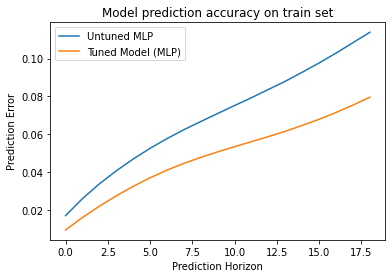

In [ ]:
graph = KstepPredAccGraph(system, trajs, kmax=20, metric="rmse")
graph.add_model(untuned_model, "Untuned MLP")
graph.add_model(tuned_model, "Tuned Model (MLP)")

fig = plt.figure()
ax = fig.gca()
graph(fig, ax)
ax.set_title("Model prediction accuracy on training set")
plt.show()